In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df=pd.read_excel('Data_Train.xlsx')

In [3]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [5]:
df.shape

(6019, 13)

In [6]:
df.Location.unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'], dtype=object)

In [7]:
len(df.Location.unique())

11

In [8]:
df.Fuel_Type.unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [9]:
df[df['Fuel_Type']=='Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58 Lakh,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,NaN,12.75


## Mileage Feature

In [10]:
df.Mileage.head()

0    26.6 km/kg
1    19.67 kmpl
2     18.2 kmpl
3    20.77 kmpl
4     15.2 kmpl
Name: Mileage, dtype: object

In [11]:
df['Mileage']=df.Mileage.apply(lambda x: str(x).replace('km/kg',''))
df['Mileage']=df.Mileage.apply(lambda x: str(x).replace('kmpl',''))

In [12]:
df.Mileage.head()

0     26.6 
1    19.67 
2     18.2 
3    20.77 
4     15.2 
Name: Mileage, dtype: object

In [13]:
df.Mileage=df.Mileage.astype('float64')

In [14]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968 CC,140.8 bhp,5.0,NaN,17.74


In [15]:
df.Mileage.describe()

count    6017.000000
mean       18.134961
std         4.582289
min         0.000000
25%        15.170000
50%        18.150000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

#### We can see min value for mileage is 0 which can't be true

In [16]:
df[df["Mileage"]==0].shape

(68, 13)

#### there are 68 rows where Mileage is 0

C:\Users\SKS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


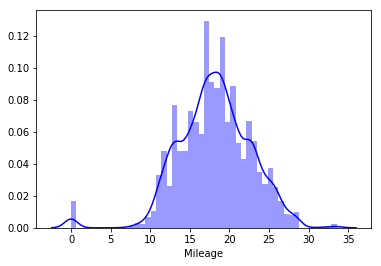

In [17]:
sns.distplot(df['Mileage'].dropna(), hist=True, kde=True, color = 'blue')

In [18]:
df.groupby(by=['Fuel_Type','Transmission'])['Mileage'].median()

Fuel_Type  Transmission
CNG        Manual          26.60
Diesel     Automatic       16.00
           Manual          20.77
Electric   Automatic         NaN
LPG        Manual          18.25
Petrol     Automatic       15.60
           Manual          18.20
Name: Mileage, dtype: float64

In [19]:
df.groupby(by=['Fuel_Type','Transmission','Owner_Type'])['Mileage'].median()

Fuel_Type  Transmission  Owner_Type    
CNG        Manual        First             26.600
                         Second            26.600
                         Third             17.000
Diesel     Automatic     First             16.070
                         Second            15.200
                         Third             16.910
           Manual        First             21.190
                         Fourth & Above    12.800
                         Second            19.010
                         Third             16.000
Electric   Automatic     First                NaN
LPG        Manual        First             19.200
                         Second            16.325
Petrol     Automatic     First             16.500
                         Fourth & Above     9.700
                         Second            13.650
                         Third             11.700
           Manual        First             18.500
                         Fourth & Above    16.100
          

In [20]:
for i in range(6019):
    if (df.iloc[i,4]=='CNG' and df.iloc[i,6]=='First' and df.iloc[i,7]==0):
        df.iloc[i,7]=26.60
    elif (df.iloc[i,4]=='CNG' and df.iloc[i,6]=='Second' and df.iloc[i,7]==0):
        df.iloc[i,7]=26.60
    elif (df.iloc[i,4]=='CNG' and df.iloc[i,6]=='Third' and df.iloc[i,7]==0):
        df.iloc[i,7]=17.00
    elif (df.iloc[i,4]=='Diesel' and df.iloc[i,5]=='Automatic' and df.iloc[i,6]=='First' and df.iloc[i,7]==0):
        df.iloc[i,7]=16.070
    elif (df.iloc[i,4]=='Diesel' and df.iloc[i,5]=='Automatic' and df.iloc[i,6]=='Second' and df.iloc[i,7]==0):
        df.iloc[i,7]=15.970
    elif (df.iloc[i,4]=='Diesel' and df.iloc[i,5]=='Automatic' and df.iloc[i,6]=='Third' and df.iloc[i,7]==0):
        df.iloc[i,7]=16.910
    elif (df.iloc[i,4]=='Diesel' and df.iloc[i,5]=='Manual' and df.iloc[i,6]=='First' and df.iloc[i,7]==0):
        df.iloc[i,7]=21.190
    elif (df.iloc[i,4]=='Diesel' and df.iloc[i,5]=='Manual' and df.iloc[i,6]=='Second' and df.iloc[i,7]==0):
        df.iloc[i,7]=19.050
    elif (df.iloc[i,4]=='Diesel' and df.iloc[i,5]=='Manual' and df.iloc[i,6]=='Third' and df.iloc[i,7]==0):
        df.iloc[i,7]=16.000
    elif (df.iloc[i,4]=='Diesel' and df.iloc[i,5]=='Manual' and df.iloc[i,6]=='Fourth & Above' and df.iloc[i,7]==0):
        df.iloc[i,7]=12.800
    elif (df.iloc[i,4]=='LPG' and df.iloc[i,6]=='First' and df.iloc[i,7]==0):
        df.iloc[i,7]=19.200
    elif (df.iloc[i,4]=='LPG' and df.iloc[i,6]=='Second' and df.iloc[i,7]==0):
        df.iloc[i,7]=16.325
    elif (df.iloc[i,4]=='Petrol' and df.iloc[i,5]=='Automatic' and df.iloc[i,6]=='First' and df.iloc[i,7]==0):
        df.iloc[i,7]=16.500
    elif (df.iloc[i,4]=='Petrol' and df.iloc[i,5]=='Automatic' and df.iloc[i,6]=='Second' and df.iloc[i,7]==0):
        df.iloc[i,7]=13.650
    elif (df.iloc[i,4]=='Petrol' and df.iloc[i,5]=='Automatic' and df.iloc[i,6]=='Third' and df.iloc[i,7]==0):
        df.iloc[i,7]=11.700
    elif (df.iloc[i,4]=='Petrol' and df.iloc[i,5]=='Automatic' and df.iloc[i,6]=='Fourth & Above' and df.iloc[i,7]==0):
        df.iloc[i,7]=9.700
    elif (df.iloc[i,4]=='Petrol' and df.iloc[i,5]=='Manual' and df.iloc[i,6]=='First' and df.iloc[i,7]==0):
        df.iloc[i,7]=18.500
    elif (df.iloc[i,4]=='Petrol' and df.iloc[i,5]=='Manual' and df.iloc[i,6]=='Second' and df.iloc[i,7]==0):
        df.iloc[i,7]=17.300
    elif (df.iloc[i,4]=='Petrol' and df.iloc[i,5]=='Manual' and df.iloc[i,6]=='Third' and df.iloc[i,7]==0):
        df.iloc[i,7]=16.470
    elif (df.iloc[i,4]=='Petrol' and df.iloc[i,5]=='Manual' and df.iloc[i,6]=='Fourth & Above' and df.iloc[i,7]==0):
        df.iloc[i,7]=16.100
    
        

In [21]:
df[df["Mileage"]==0].shape

(0, 13)

In [22]:
df.Mileage.describe()

count    6017.000000
mean       18.331481
std         4.156115
min         6.400000
25%        15.400000
50%        18.200000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

In [23]:
df.Mileage.fillna(18.20,inplace=True)

In [24]:
df.Mileage.isnull().sum()

0

C:\Users\SKS\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


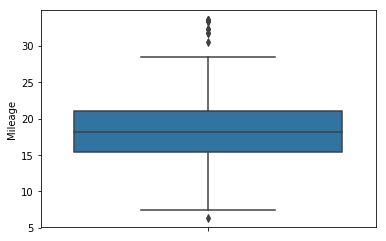

In [25]:
sns.boxplot( y=df["Mileage"] )


In [26]:
for i in range(0,101,10):
    print("%dth Percentile- %f "%(i,np.percentile(df.Mileage,i)))

0th Percentile- 6.400000 
10th Percentile- 12.800000 
20th Percentile- 14.700000 
30th Percentile- 16.090000 
40th Percentile- 17.050000 
50th Percentile- 18.200000 
60th Percentile- 19.010000 
70th Percentile- 20.360000 
80th Percentile- 22.070000 
90th Percentile- 24.000000 
100th Percentile- 33.540000 


In [27]:


for i in range(90,101,1):
    print("%dth Percentile- %f "%(i,np.percentile(df.Mileage,i)))
    

90th Percentile- 24.000000 
91th Percentile- 24.300000 
92th Percentile- 24.400000 
93th Percentile- 25.076600 
94th Percentile- 25.200000 
95th Percentile- 25.470000 
96th Percentile- 25.800000 
97th Percentile- 26.200000 
98th Percentile- 26.830000 
99th Percentile- 28.090000 
100th Percentile- 33.540000 


## Engine Feature

In [28]:
df.Engine.head()

0     998 CC
1    1582 CC
2    1199 CC
3    1248 CC
4    1968 CC
Name: Engine, dtype: object

In [29]:
df['Engine']=df.Engine.apply(lambda x: str(x).replace('CC',''))

In [30]:
df.Engine=df.Engine.astype('float64')

In [31]:
df.Engine.describe()

count    5983.000000
mean     1621.276450
std       601.355233
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1984.000000
max      5998.000000
Name: Engine, dtype: float64

In [32]:
df[df.Engine.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,18.50,NaN,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,NaN,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,15.97,NaN,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,NaN,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,17.30,NaN,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,18.50,NaN,NaN,NaN,NaN,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.10,NaN,NaN,NaN,NaN,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,18.50,NaN,NaN,NaN,NaN,1.93


In [33]:
df.groupby(by=['Fuel_Type','Transmission'])['Engine'].median()

Fuel_Type  Transmission
CNG        Manual           998.0
Diesel     Automatic       2143.0
           Manual          1461.0
Electric   Automatic        935.0
LPG        Manual          1061.0
Petrol     Automatic       1591.0
           Manual          1197.0
Name: Engine, dtype: float64

In [34]:
df.Engine.fillna(0,inplace=True)

In [35]:
for i in range(6019):
    if (df.iloc[i,4]=='CNG' and df.iloc[i,8]==0):
        df.iloc[i,8]=998.0
    elif (df.iloc[i,4]=='Diesel' and df.iloc[i,5]=='Automatic' and df.iloc[i,8]==0):
        df.iloc[i,8]=2143.0
    elif (df.iloc[i,4]=='Diesel' and df.iloc[i,5]=='Manual' and df.iloc[i,8]==0):
        df.iloc[i,8]=1461.0
    elif (df.iloc[i,4]=='Electric' and df.iloc[i,8]==0):
        df.iloc[i,8]=935.0
    elif (df.iloc[i,4]=='LPG' and df.iloc[i,8]==0):
        df.iloc[i,8]=1061.0
    elif (df.iloc[i,4]=='Petrol' and df.iloc[i,5]=='Automatic' and df.iloc[i,8]==0):
        df.iloc[i,8]=1591.0
    elif (df.iloc[i,4]=='Petrol' and df.iloc[i,5]=='Manual' and df.iloc[i,8]==0):
        df.iloc[i,8]=1197.0

In [36]:
(df.iloc[194,8])

1197.0

C:\Users\SKS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


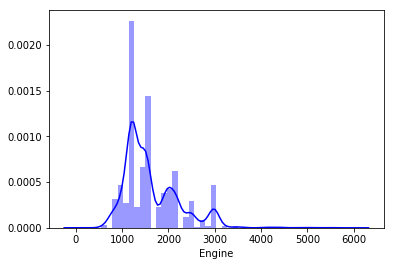

In [37]:
sns.distplot(df['Engine'], hist=True, kde=True, color = 'blue')

In [38]:
df.Mileage.describe()

count    6019.000000
mean       18.331437
std         4.155425
min         6.400000
25%        15.400000
50%        18.200000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

C:\Users\SKS\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


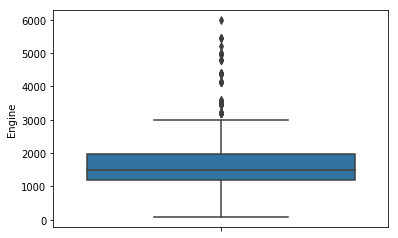

In [39]:
sns.boxplot( y=df["Engine"] )

In [40]:
for i in range(0,101,10):
    print("%dth Percentile- %f "%(i,np.percentile(df.Engine,i)))

0th Percentile- 72.000000 
10th Percentile- 1061.000000 
20th Percentile- 1197.000000 
30th Percentile- 1199.000000 
40th Percentile- 1298.000000 
50th Percentile- 1493.000000 
60th Percentile- 1498.800000 
70th Percentile- 1799.000000 
80th Percentile- 2143.000000 
90th Percentile- 2494.000000 
100th Percentile- 5998.000000 


In [41]:
for i in range(90,101,1):
    print("%dth Percentile- %f "%(i,np.percentile(df.Engine,i)))
    

90th Percentile- 2494.000000 
91th Percentile- 2494.000000 
92th Percentile- 2523.000000 
93th Percentile- 2755.000000 
94th Percentile- 2967.000000 
95th Percentile- 2982.000000 
96th Percentile- 2982.000000 
97th Percentile- 2987.000000 
98th Percentile- 2993.000000 
99th Percentile- 3161.360000 
100th Percentile- 5998.000000 


## Power Feature

In [42]:
df.Power.head()

0    58.16 bhp
1    126.2 bhp
2     88.7 bhp
3    88.76 bhp
4    140.8 bhp
Name: Power, dtype: object

In [43]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [44]:
df[df.Power.isnull()].shape

(36, 13)

In [45]:
df[df.Power=='null']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


In [46]:
nul_index=df[df.Power.isnull()].index

In [47]:
for i in range(6019):
    if i not in nul_index:
        df.iloc[i,9]=str(df.iloc[i,9]).replace('bhp','')

In [48]:
df.iloc[5270,9]

nan

In [49]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.2,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.7,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.8,5.0,NaN,17.74


In [50]:
df.Power.fillna('100000',inplace=True)

In [51]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [52]:
df[df.Power=='null ']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.80,1399.0,null,5.0,NaN,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,18.50,1086.0,null,5.0,NaN,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.00,1086.0,null,5.0,NaN,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.00,1086.0,null,5.0,NaN,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.00,1086.0,null,5.0,NaN,1.67
227,Maruti Swift VDI BSIV,Delhi,2013,47000,Diesel,Manual,First,17.80,1248.0,null,5.0,NaN,4.10
245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third,17.00,1086.0,null,5.0,NaN,0.95
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,18.50,1086.0,null,5.0,NaN,1.75
307,Hyundai Santro Xing XL,Chennai,2006,58000,Petrol,Manual,Second,17.30,1086.0,null,5.0,NaN,1.50
308,Maruti Swift VDI BSIV,Kolkata,2011,60020,Diesel,Manual,First,17.80,1248.0,null,5.0,NaN,2.50


In [53]:
for i in range(6019):
    if df.iloc[i,9]=='null ':
        df.iloc[i,9]=100000

In [54]:
df[df.Power=='null ']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


In [55]:
df.Power=df.Power.astype('float64')

In [56]:
df.groupby(by=['Fuel_Type','Transmission'])['Power'].median()

Fuel_Type  Transmission
CNG        Manual           58.20
Diesel     Automatic       177.00
           Manual           90.00
Electric   Automatic        57.00
LPG        Manual           58.20
Petrol     Automatic       120.70
           Manual           81.86
Name: Power, dtype: float64

In [57]:
for i in range(6019):
    if (df.iloc[i,4]=='CNG' and df.iloc[i,9]==100000):
        df.iloc[i,9]=58.20
    elif (df.iloc[i,4]=='Diesel' and df.iloc[i,5]=='Automatic' and df.iloc[i,9]==100000):
        df.iloc[i,9]=177.00
    elif (df.iloc[i,4]=='Diesel' and df.iloc[i,5]=='Manual' and df.iloc[i,9]==100000):
        df.iloc[i,9]=90.00
    elif (df.iloc[i,4]=='Electric' and df.iloc[i,9]==100000):
        df.iloc[i,9]=57.00
    elif (df.iloc[i,4]=='LPG' and df.iloc[i,9]==100000):
        df.iloc[i,9]=58.20
    elif (df.iloc[i,4]=='Petrol' and df.iloc[i,5]=='Automatic' and df.iloc[i,9]==100000):
        df.iloc[i,9]=120.70
    elif (df.iloc[i,4]=='Petrol' and df.iloc[i,5]=='Manual' and df.iloc[i,9]==100000):
        df.iloc[i,9]=81.86

In [58]:
df.Power.describe()

count    6019.000000
mean      112.748862
std        53.454545
min        34.200000
25%        78.000000
50%        92.000000
75%       138.100000
max       560.000000
Name: Power, dtype: float64

In [59]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                  42
New_Price            5195
Price                   0
dtype: int64

C:\Users\SKS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


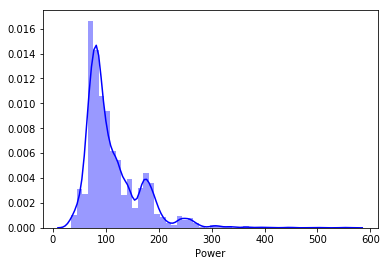

In [60]:
sns.distplot(df['Power'], hist=True, kde=True, color = 'blue')

C:\Users\SKS\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


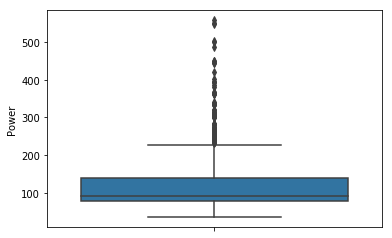

In [61]:
sns.boxplot( y=df["Power"] )

In [62]:
for i in range(0,101,10):
    print("%dth Percentile- %f "%(i,np.percentile(df.Power,i)))
    


0th Percentile- 34.200000 
10th Percentile- 67.040000 
20th Percentile- 74.000000 
30th Percentile- 81.830000 
40th Percentile- 86.800000 
50th Percentile- 92.000000 
60th Percentile- 105.000000 
70th Percentile- 121.360000 
80th Percentile- 150.000000 
90th Percentile- 184.000000 
100th Percentile- 560.000000 


In [63]:
for i in range(90,101,1):
    print("%dth Percentile- %f "%(i,np.percentile(df.Power,i)))

90th Percentile- 184.000000 
91th Percentile- 187.700000 
92th Percentile- 190.000000 
93th Percentile- 190.000000 
94th Percentile- 198.166000 
95th Percentile- 204.000000 
96th Percentile- 224.972800 
97th Percentile- 241.400000 
98th Percentile- 258.000000 
99th Percentile- 282.000000 
100th Percentile- 560.000000 


In [64]:
for i in np.arange(99,100.1,0.1):
    print("%.1fth Percentile- %f "%(i,np.percentile(df.Power,i)))
    

99.0th Percentile- 282.000000 
99.1th Percentile- 300.000000 
99.2th Percentile- 306.000000 
99.3th Percentile- 308.430000 
99.4th Percentile- 319.244000 
99.5th Percentile- 335.200000 
99.6th Percentile- 339.661600 
99.7th Percentile- 364.900000 
99.8th Percentile- 394.974800 
99.9th Percentile- 450.000000 
100.0th Percentile- 560.000000 


In [65]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                  42
New_Price            5195
Price                   0
dtype: int64

# Seats Features

In [66]:
df.Seats.head()

0    5.0
1    5.0
2    5.0
3    7.0
4    5.0
Name: Seats, dtype: float64

In [67]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [68]:
df[df.Seats.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,18.50,1197.0,81.86,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,1197.0,81.86,NaN,NaN,2.11
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,21.19,1498.0,99.00,NaN,NaN,3.60
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.10,1197.0,81.86,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,15.97,2143.0,177.00,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.80,1197.0,81.86,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.10,1197.0,81.86,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,17.30,1197.0,81.86,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,18.50,1197.0,81.86,NaN,NaN,40.88
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,13.00,1493.0,100.00,NaN,NaN,1.70


In [69]:
df.Seats.fillna(0,inplace=True)

In [70]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5195
Price                   0
dtype: int64

In [71]:
df.groupby(by=['Fuel_Type','Transmission'])['Seats'].median()

Fuel_Type  Transmission
CNG        Manual          5.0
Diesel     Automatic       5.0
           Manual          5.0
Electric   Automatic       5.0
LPG        Manual          5.0
Petrol     Automatic       5.0
           Manual          5.0
Name: Seats, dtype: float64

C:\Users\SKS\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


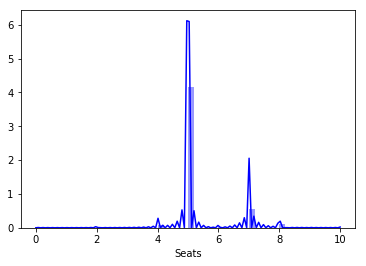

In [72]:
sns.distplot(df['Seats'], hist=True, kde=True, color = 'blue')

In [73]:
for i in range(6019):
    if df.iloc[i,10]==0:
        df.iloc[i,10]=5

In [74]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price            5195
Price                   0
dtype: int64

In [75]:
df.drop('New_Price',axis=1,inplace=True)

In [76]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


# Owner_Type Feature

In [77]:
df.Owner_Type.isnull().sum()

0

In [78]:
df.Owner_Type.unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [79]:
for i in range(6019):
    if df.iloc[i,6]=='First':
        df.iloc[i,6]=1
    elif df.iloc[i,6]=='Second':
        df.iloc[i,6]=2
    elif df.iloc[i,6]=='Third':
        df.iloc[i,6]=3
    else:
        df.iloc[i,6]=4

In [80]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,17.74


In [81]:
df.Location=df.Location.astype('category')
df.Year=df.Year.astype('category')
df.Fuel_Type=df.Fuel_Type.astype('category')
df.Transmission=df.Transmission.astype('category')


In [82]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()
df_loc=cv.fit_transform(df['Location'])

In [83]:
type(df_loc)

scipy.sparse.csr.csr_matrix

In [84]:
df_loc=pd.DataFrame(data=df_loc.toarray(),columns=cv.get_feature_names())

In [85]:
df_loc.head()

,ahmedabad,bangalore,chennai,coimbatore,delhi,hyderabad,jaipur,kochi,kolkata,mumbai,pune
0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [86]:
cv=CountVectorizer()
df_fuel=cv.fit_transform(df['Fuel_Type'])
df_fuel=pd.DataFrame(data=df_fuel.toarray(),columns=cv.get_feature_names())
df_fuel.head()

,cng,diesel,electric,lpg,petrol
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,1,0,0,0


In [87]:
cv=CountVectorizer()
df_trans=cv.fit_transform(df['Transmission'])
df_trans=pd.DataFrame(data=df_trans.toarray(),columns=cv.get_feature_names())
df_trans.head()

,automatic,manual
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [88]:
#df['Car_Age']=df['Year'].apply(lambda x:float(2019)-float(x))

In [89]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,1,26.60,998.0,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,5.0,17.74


In [90]:
cv=CountVectorizer()
df_year=cv.fit_transform(df['Year'].astype(str))
df_year=pd.DataFrame(data=df_year.toarray(),columns=cv.get_feature_names())
df_year.head()

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec=TfidfVectorizer(lowercase=True, stop_words='english', ngram_range=(1, 1), max_df=1.0, min_df=2, binary=True)

df_new=vec.fit_transform(df['Name'])

In [92]:
type(df_new)

scipy.sparse.csr.csr_matrix

In [93]:
df_new=pd.DataFrame(data=df_new.toarray(),columns=vec.get_feature_names())

In [94]:
df_new.head()

,05,0d,0l,100,110,110ps,118d,16,177,1l,...,yeti,z4,zdi,zen,zest,zeta,zipplus,zlx,zx,zxi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
df = pd.concat([df, df_loc], axis=1)
df = pd.concat([df, df_fuel], axis=1)
df = pd.concat([df, df_trans], axis=1)
df = pd.concat([df, df_year], axis=1)
df = pd.concat([df, df_new], axis=1)

In [96]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,...,yeti,z4,zdi,zen,zest,zeta,zipplus,zlx,zx,zxi
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,1,26.60,998.0,58.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,1,19.67,1582.0,126.20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,2,15.20,1968.0,140.80,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
df.drop(['Name','Location','Year','Fuel_Type','Transmission'],inplace=True,axis=1)

In [98]:
df.head()

,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,ahmedabad,bangalore,chennai,...,yeti,z4,zdi,zen,zest,zeta,zipplus,zlx,zx,zxi
0,72000,1,26.60,998.0,58.16,5.0,1.75,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,41000,1,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,46000,1,18.20,1199.0,88.70,5.0,4.50,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,87000,1,20.77,1248.0,88.76,7.0,6.00,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40670,2,15.20,1968.0,140.80,5.0,17.74,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
df_test=np.log1p(df['Price'])

In [100]:
df_test.head()

0    1.011601
1    2.602690
2    1.704748
3    1.945910
4    2.930660
Name: Price, dtype: float64

In [101]:
df_train=df.drop('Price',axis=1)

In [102]:
df_train.head()

,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,ahmedabad,bangalore,chennai,coimbatore,...,yeti,z4,zdi,zen,zest,zeta,zipplus,zlx,zx,zxi
0,72000,1,26.60,998.0,58.16,5.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,41000,1,19.67,1582.0,126.20,5.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,46000,1,18.20,1199.0,88.70,5.0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,87000,1,20.77,1248.0,88.76,7.0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40670,2,15.20,1968.0,140.80,5.0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
#df.Car_Age=df.Car_Age.astype('float64')

In [104]:
#df.drop('Car_Age',axis=1,inplace=True)

In [105]:
df.head()

,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Price,ahmedabad,bangalore,chennai,...,yeti,z4,zdi,zen,zest,zeta,zipplus,zlx,zx,zxi
0,72000,1,26.60,998.0,58.16,5.0,1.75,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,41000,1,19.67,1582.0,126.20,5.0,12.50,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,46000,1,18.20,1199.0,88.70,5.0,4.50,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,87000,1,20.77,1248.0,88.76,7.0,6.00,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40670,2,15.20,1968.0,140.80,5.0,17.74,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [106]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Columns: 678 entries, Kilometers_Driven to zxi
dtypes: float64(636), int64(42)
memory usage: 31.1 MB
None


In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_train.values,df_test.values,test_size=0.2)

In [108]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error

In [109]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [110]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [111]:
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  18 out of  18 | elapsed:  3.8min finished


0.934504269432
{'colsample_bytree': 0.7, 'learning_rate': 0.07, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [112]:
y_pred = xgb_grid.predict(X_test)


In [113]:
from sklearn.metrics import mean_squared_log_error

In [114]:
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred))))

RMSLE: 0.15782298171397957
